# Assignment

1. Top 50 beers scraped into DF
2. Diff types freq of beer in top 50 
3. Freq breweries in top 50
4. Which beers have most reviews & distribution of ratings (normal, etc...)
5. ABV/IBU/Specific gravity stats and correlations with score
6. All reviews from top 50 beers & sentiment analysis
7. Most freq words (top 5) for top 50 beers

In [2]:
# import statements
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from urllib.request import urlopen, Request
from scipy.stats.mstats import normaltest

In [3]:
# Test for Setting paramters for scraping beer list
# First scrape of urls from the top 50 list

base_url = 'https://www.ratebeer.com'
top = '/top'
top_url = base_url + top
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(top_url,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'lxml')

In [5]:
# find table rows in the table

table = soup.find('table')
beer_50_html = table.find_all('tr')

# creating all of beer_df, exporting to csv. only needs to be run once, beer_df recreated from csv in future

# creating beer_df. Initialize empty array, grab info and append to df

array = []

for i in range(1,len(beer_50_html)):
    tags = beer_50_html[i].get_text(separator='$').split('$')
    del tags[2]
    array.append(tags)

beer_df = pd.DataFrame(array, columns=['Rank', 'Name', 'Type','Reviews','ABV', 'Score'])
beer_df['Link'] = [a['href'] for a in soup.find_all('a', href=True)][26:126:2]
beer_df['Link'] = base_url + beer_df.Link 
beer_df[['Reviews', 'Score', 'Rank']] = beer_df[['Reviews', 'Score', 'Rank']].astype(float)
beer_df['ABV'] = beer_df.ABV.str.replace("%", "").replace("-", "nan")
beer_df['ABV'] = beer_df.ABV.astype(float)

# Creating a list of Breweries
# Create list of breweries that can be added as a column

brewery = []

# Iterate over links in beer_df using what we tested out above
for link in beer_df.Link:
    url = link
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    table = soup.find('table')
    soup.find_all('span')
    brewery.append([a for a in soup.find_all('span', itemprop=True)][2].get_text())
beer_df['Brewery'] = brewery

# Same for city and state for brewery

city = []
state = []

for link in beer_df.Link:
    url = link
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    try: 
        loc = [x.get_text().strip() for x in soup.find('div', {'class':'col-md-10'}).find_all('a', {'href':lambda x: 'laces' in x})]
        city.append(loc[0])
        state.append(loc[1])
    except:
        loc = soup.find_all('span', itemprop=False)[4].get_text().replace("\r\n", '').replace(" ", '').replace(":", '')
        city.append("")
        state.append(loc)

beer_df['City'] = city
beer_df['State'] = state

# Adding beer top level Description on to beer_df

desc = []

# Iterate over links
for link in beer_df.Link:
    # standard stuff
    url = link
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    
    # Find table, get rid of crap
    table = soup.find('table')
    desc.append(soup.find(itemprop="description").get_text().replace("\r\n",'').replace("  ",''))

# Add it to the dataframe    
beer_df['Description'] = desc

# Save beer_df as csv, so can be brought back in easily
beer_df.to_csv('./Files/beer_dataframe.csv')

In [1]:
# Reinitalize beer_df if needed

beer_df = pd.DataFrame.from_csv('./Files/beer_dataframe.csv')

NameError: name 'pd' is not defined

In [6]:
pd.DataFrame.from_csv('beer_dataframe.csv')

,Rank,Name,Type,Reviews,ABV,Score,Link,Brewery,City,State,Description
0,1.0,Toppling Goliath Kentucky Brunch,Imperial Stout,130.0,12.0,4.53,https://www.ratebeer.com/beer/toppling-goliath...,Toppling Goliath,Decorah,Iowa,This beer is the real McCoy. Barrel aged and c...
1,2.0,Westvleteren 12 (XII),Abt/Quadrupel,3444.0,10.2,4.43,https://www.ratebeer.com/beer/westvleteren-12-...,Westvleteren Abdij St. Sixtus,NaN,Belgium,Westvleteren has the smallest output of the Tr...
2,3.0,Toppling Goliath Mornin' Delight,Imperial Stout,220.0,12.0,4.40,https://www.ratebeer.com/beer/toppling-goliath...,Toppling Goliath,Decorah,Iowa,A huge Imperial Stout with an explosive espres...
3,4.0,Cigar City Hunahpu's Imperial Stout - Double B...,Imperial Stout,313.0,11.0,4.39,https://www.ratebeer.com/beer/cigar-city-hunah...,Cigar City Brewing,Tampa,Florida,"50% aged in Rum barrels, 50% aged in Apple Bra..."
4,5.0,Three Floyds Dark Lord Russian Imperial Stout ...,Imperial Stout,407.0,15.0,4.35,https://www.ratebeer.com/beer/three-floyds-dar...,Three Floyds Brewing Company,Munster,Indiana,Dark Lord aged in a variety of Bourbon barrels...
5,6.0,Russian River Pliny the Younger,Imperial IPA,728.0,11.0,4.35,https://www.ratebeer.com/beer/russian-river-pl...,Russian River Brewing,Santa Rosa,California,Pliny the Younger was Pliny the Elder’s nephe...
6,7.0,Three Floyds Dark Lord Russian Imperial Stout ...,Imperial Stout,424.0,14.0,4.33,https://www.ratebeer.com/beer/three-floyds-dar...,Three Floyds Brewing Company,Munster,Indiana,Dark Lord Russian Imperial Stout aged in a var...
7,8.0,AleSmith Speedway Stout - Bourbon Barrel Aged,Imperial Stout,858.0,12.0,4.33,https://www.ratebeer.com/beer/alesmith-speedwa...,AleSmith Brewing Company,San Diego,California,Special Markings: Gold foil neck and white num...
8,9.0,Bell's Black Note Stout,Imperial Stout,956.0,10.8,4.31,https://www.ratebeer.com/beer/bell39s-black-no...,Bell's Brewery,Galesburg,Michigan,One of the most sought-after stouts in Bell’s ...
9,10.0,Founders CBS (Canadian Breakfast Stout),Imperial Stout,1015.0,11.7,4.30,https://www.ratebeer.com/beer/founders-cbs-40c...,Founders Brewing Company,Grand Rapids,Michigan,Imperial Stout brewed with Chocolate and Coffe...


# Now that the df is complete, time for a mini EDA

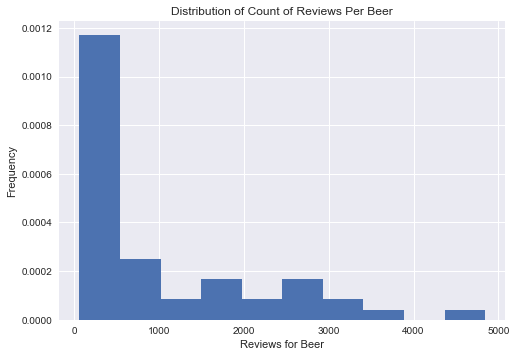

In [754]:
# Histogram of number of reviews. And examining data

_ = plt.hist(beer_df.Reviews, normed=True)
_ = plt.xlabel('Reviews for Beer')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Count of Reviews Per Beer')
plt.show()

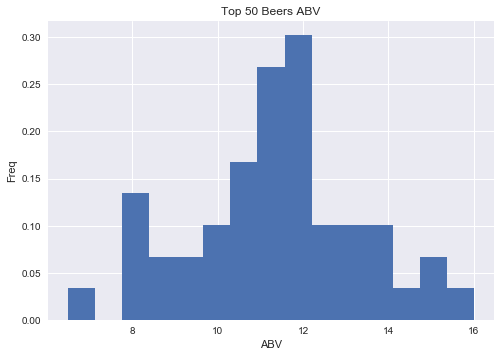

In [755]:
# Now to make a histogram of the ABV

_ = plt.hist(beer_df.ABV.dropna(), bins=15, normed=True) 
_ = plt.title('Top 50 Beers ABV')
_ = plt.xlabel('ABV')
_ = plt.ylabel('Freq')
plt.show()

In [756]:
# List of Most reviewed beers
beer_df.sort_values('Reviews', ascending=False).head(5)

,Rank,Name,Type,Reviews,ABV,Score,Link,Brewery,City,State,Description
10,11.0,Rochefort Trappistes 10,Abt/Quadrupel,4845.0,11.3,4.30,https://www.ratebeer.com/beer/rochefort-trappi...,Brasserie Rochefort,NaN,Belgium,The top product from the Rochefort Trappist br...
1,2.0,Westvleteren 12 (XII),Abt/Quadrupel,3444.0,10.2,4.43,https://www.ratebeer.com/beer/westvleteren-12-...,Westvleteren Abdij St. Sixtus,NaN,Belgium,Westvleteren has the smallest output of the Tr...
17,18.0,Bell's Expedition Stout,Imperial Stout,3096.0,10.5,4.27,https://www.ratebeer.com/beer/bell39s-expediti...,Bell's Brewery,Galesburg,Michigan,One of the earliest examples of the Russian Im...
12,13.0,AleSmith Speedway Stout,Imperial Stout,2964.0,12.0,4.29,https://www.ratebeer.com/beer/alesmith-speedwa...,AleSmith Brewing Company,San Diego,California,"Bottle conditioned.Speedway Stout’s ominous, p..."
21,22.0,Goose Island Bourbon County Stout,Imperial Stout,2798.0,13.8,4.26,https://www.ratebeer.com/beer/goose-island-bou...,Goose Island Beer Company (AB-InBev),Chicago,Illinois,"""I really wanted to do something special for o..."


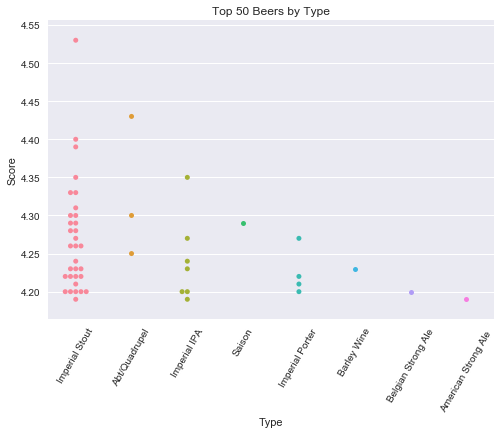

In [25]:
# Swarm plot of Beer Type using Seaborn (sns) 


_ = sns.swarmplot(x='Type', y='Score', data=beer_df)
_ = plt.xticks(rotation=60)
_ = plt.title('Top 50 Beers by Type')
plt.show()

# Looks like Imperial Stouts dominate the list, followed by Imperial IPAs

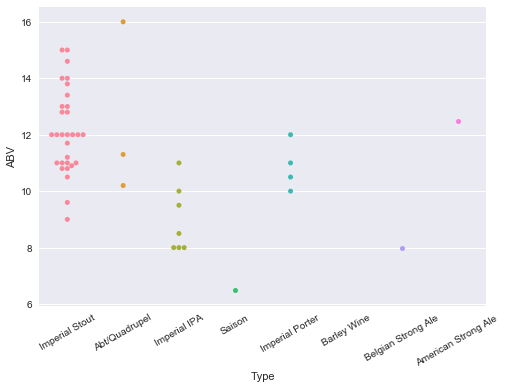

In [26]:
# Swarmplot of ABV by beer type

_ = sns.swarmplot(x='Type', y='ABV', data=beer_df)
_ = plt.xticks(rotation=30)
plt.show()

# Does not seem like there are really trends worth looking into at this point.
# It is interesting that 12% ABV seems to be a target for Imperial Stouts

In [760]:
# Listing of beer types in top 50 (Sorted)

beer_df.groupby('Type').count().reset_index().sort_values('Rank', ascending=False)[['Type', 'Description']]

,Type,Description
6,Imperial Stout,32
4,Imperial IPA,7
5,Imperial Porter,4
0,Abt/Quadrupel,3
1,American Strong Ale,1
2,Barley Wine,1
3,Belgian Strong Ale,1
7,Saison,1


In [28]:
# Another way of looking at counts
beer_df['Type'].value_counts()

Imperial Stout          32
Imperial IPA             7
Imperial Porter          4
Abt/Quadrupel            3
American Strong Ale      1
Saison                   1
Barley Wine              1
Belgian Strong Ale       1
Name: Type, dtype: int64

In [29]:
# Top 5 Breweries
beer_df.Brewery.value_counts()[:5]

Three Floyds Brewing Company    4
Toppling Goliath                4
AleSmith Brewing Company        4
Bell's Brewery                  4
Cigar City Brewing              3
Name: Brewery, dtype: int64

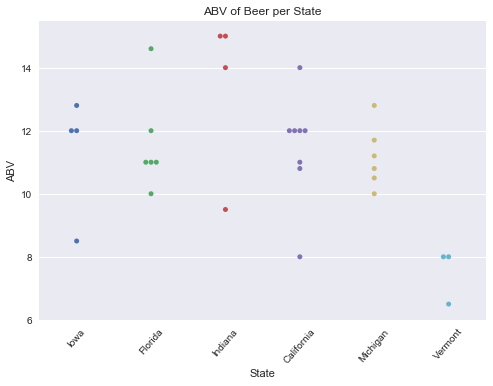

In [761]:
# Now we can look at whether certain states might have higher ABVs

# Swarm plot of ABV/state (min 4 beers/state)

state_dict = (beer_df.State.value_counts() > 3).to_dict()

_ = sns.swarmplot(x='State', y='ABV', data=beer_df[beer_df['State'].map(state_dict)])
_ = plt.xticks(rotation=49)
_ = plt.title('ABV of Beer per State')
plt.show()

In [318]:
# Trial run for grabbing reviewer info using toppling goliath 
# first page only

url = 'https://www.ratebeer.com/beer/toppling-goliath-kentucky-brunch/166019/1/1/'
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(url,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'lxml')
reviews = soup.find('div', class_='reviews-container')
reviewer_info = reviews.find('div').get_text(separator='^').split('^')

In [763]:
# now lets take this to the next level, grabing rating, review, name, location, and date
# Scraped all review info above

# to keep reviewer info from being overwtitten in tests, renaming to bit

bit = reviewer_info

# basically while true, remove (' ') and 'does not count' fields as they were added by system and mess up order

for i in range(30):
    try:
        bit.remove(' ')
        #print('removed " "')
    except ValueError:
        #print('no more " "')
        pass

for i in range(30):
    try:
        bit.remove('does not count ')
        #print('removed does not count')
    except ValueError:
        #print("no more 'does not count ")
        pass
    
# bit is processed now (except for multi paragraph reviews which will be solved later) & split location/date

# create empty dict, and titles for the reviews
reviewer_dict = {}
chars_reviewer = ['Rating', 'Name', 'Location & date', 'Review']

# Since each review chunk is 4 items long, well grab 0-4, add, then increment start/end values

start = 0
end = 4

# iterate over len(reviewer_info)

for i in range(len(reviewer_info)):
    small_bit = reviewer_info[start:end]
    start += 4
    end  += 4
    reviewer_dict[i] = small_bit

In [766]:
# We now have (mostly) the top level review, reviewer, date/location, and review

reviewer_dict[0]

['3',
 'asarkar\xa0(2)',
 ' - INDIA - FEB 13, 2018 ',
 'o\tStyleo\tStyleo\tStyleo\tStyleo\tStyleo\tStyleo\tStyleo ']

In [33]:
# Now to put the above into a function form. we can now iterate over pages

def ratings_from_url(url, titles=False, all_ratings=False):
    '''Input url, return all ratings in dict form, args are:
    url: url to be scraped
    titles=False - Description of each ratings (aroma, appearance, etc...)
    all_ratings=False - issue with blank bits, set to false to only grab top level review
    '''
    
    # Defining terms- creating soup. hdr to get around error, grab div class reviews container
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    reviews = soup.find('div', class_='reviews-container')

    # take all divs w/ reviews, grab contents[1] as that is the review we want (ie [2] could be reviewer info, text)
    # create list of labels- the titles to be added when titles=True
    # define list of strings to strip from review (formatting) (work in progress)

    base = reviews.find_all("div", {"style":"padding: 0px 0px 0px 0px;"})
    chars = ['Top', 'Aroma', 'Appearance', 'Taste', 'Palate', 'Overall']
    strip_words = ['<div style="display:inline; padding: 0px 0px; font-size: 24px; font-weight: bold; color: #036;" title="', ' out of 5.0&lt;br /&gt;&lt;small&gt;Aroma ', '/10&lt;br /&gt;Appearance ', '/5&lt;br /&gt;Taste ', '/10&lt;br /&gt;Palate ', '/5&lt;br /&gt;Overall ', '/20&lt;br /&gt;&lt;/small&gt;">', '</div>', 'out', 'of', '5.0&lt;br']

    # initiate empty dict, iterate over base(individual reviews), strip html/format, zip to chars, and add to dict
    
    dict_of_ratings = {}
    
    # turning the review into a string, stripping out non ratings, splitting, and selecting- iterating over that
    
    for x in range(len(base)):
        html_ratings = str((base)[x].contents[1])
        
        for i in strip_words:
            html_ratings = html_ratings.replace(i, ' ')
        str_ratings = html_ratings.split(' ')
        
        # Creating list_ratings to grab rating(s) of interest. if all_ratings=True, grab all, otherwise just first
        
        list_ratings = str_ratings[1] # only grabbing top level
        if all_ratings == True: # grabbing all ratings -needs to be cleaned up w/ strip words
            list_ratings = str_ratings[1:-2]
        if titles == True: # Throwing titles onto the list of ratings
            dict_ratings = list(zip(chars, list_ratings)) # took out because not adding title to score
        
        # Now that list_ratings is formatted, add rating to the dict
        dict_of_ratings[x] = list_ratings

    return dict_of_ratings

In [34]:
# Writing function to grab reviews from url instead of the ratings

def review_text_from_url(url):
    '''Input url. get soup, Cast as string, format, return reviews in a list'''
    # Now to put the above into a function form. we can now iterate over pages

    # Defining terms- creating soup. hdr to get around error, grab div class reviews container
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    reviews = soup.find('div', class_='reviews-container')
    
    # Grabbing reviews from soup
    
    soup_test = soup.find('div', class_='reviews-container')

    # converting to string
    soup_test = str(soup_test.contents).replace('</small><br/><div style="padding: 20px 10px 20px 0px; border-bottom: 1px solid #e0e0e0; line-height: 1.5;">', '**')

    # removing stlyized crap
    soup_test = soup_test.replace('<small style="color: #666666">','')
    soup_test = soup_test.replace('\t', ' ')
    soup_test = soup_test.replace('\r', ' ')
    soup_test = soup_test.replace('\n', ' ')
    soup_test = soup_test.replace('</small>', '')
    soup_test = soup_test.replace("<br/><br/>", "")
    soup_test = soup_test.replace("</div><br/> </div> </div>,",'')
    soup_test = soup_test.replace("'\\n']",'')
    soup_test = soup_test.replace("<br/>",'')
    soup_test = soup_test.replace("<i>",'')
    soup_test = soup_test.replace('<a class="__cf_email__" data-cfemail="a5e7cad1d1c9c0e5e6d7c4c3d1" href="/cdn-cgi/l/email-protection">[email\xa0protected]</a>','')
    soup_test = soup_test.replace("<b>",'')
    #soup_test = soup_test.replace("",'')


    # creating split strings and splitting
    # before review
    soup_test = soup_test.replace('</div><br/><div style="padding: 0px 0px 0px 0px;"><div style="width: 70px; float: left; padding-right: 10px;">','**')
    # after review
    soup_test = soup_test.replace('</div><br/><table border="0" cellpadding="0" cellspacing="0" style="margin: 0px 0px 20px 0px;border-bottom: 1px solid #e0e0e0;">', '**')
    # splitting
    soup_test = soup_test.split("**")

    
    # new test- previously returned soup_test[1::2] and did not try to refomat
    updated_soup = soup_test[1::2]
    # grabbing review
    for num,key in enumerate(updated_soup):
        updated_soup[num] = key.split('<')[0]
        
    
    return updated_soup

In [35]:
# Now we can build on previous functions to grab all reviews from a beer from its base url

def review_text_full_from_url(base_url):
    '''Input url. get soup, Cast as string, format, return reviews in a list'''
    # Now to put the above into a function form. we can now iterate over pages

    # Defining terms- creating soup. hdr to get around error, grab div class reviews container
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    reviews = soup.find('div', class_='reviews-container')
    
    # Grabbing reviews from soup
    
    soup_test = soup.find('div', class_='reviews-container')

    # converting to string
    soup_test = str(soup_test.contents).replace('</small><br/><div style="padding: 20px 10px 20px 0px; border-bottom: 1px solid #e0e0e0; line-height: 1.5;">', '**')

    # removing stlyized crap
    soup_test = soup_test.replace('<small style="color: #666666">','')
    soup_test = soup_test.replace('\t', ' ')
    soup_test = soup_test.replace('\r', ' ')
    soup_test = soup_test.replace('\n', ' ')
    soup_test = soup_test.replace('</small>', '')
    soup_test = soup_test.replace("<br/><br/>", "")
    soup_test = soup_test.replace("</div><br/> </div> </div>,",'')
    soup_test = soup_test.replace("'\\n']",'')
    soup_test = soup_test.replace("<br/>",'')
    soup_test = soup_test.replace("<i>",'')
    soup_test = soup_test.replace('<a class="__cf_email__" data-cfemail="a5e7cad1d1c9c0e5e6d7c4c3d1" href="/cdn-cgi/l/email-protection">[email\xa0protected]</a>','')
    soup_test = soup_test.replace("<b>",'')
    #soup_test = soup_test.replace("",'')


    # creating split strings and splitting
    # before review
    soup_test = soup_test.replace('</div><br/><div style="padding: 0px 0px 0px 0px;"><div style="width: 70px; float: left; padding-right: 10px;">','**')
    # after review
    soup_test = soup_test.replace('</div><br/><table border="0" cellpadding="0" cellspacing="0" style="margin: 0px 0px 20px 0px;border-bottom: 1px solid #e0e0e0;">', '**')
    # splitting
    soup_test = soup_test.split("**")

    
    # new test- previously returned soup_test[1::2] and did not try to refomat
    updated_soup = soup_test[1::2]
    # grabbing review
    for num,key in enumerate(updated_soup):
        updated_soup[num] = key.split('<')[0]
    
    
    
    return updated_soup

In [ ]:
# Now we will create a df where ratings for each beer are in columns.
## This will help us view the data later.
## To do so we will initaite empty df, grabbing a list of all the top level reviews, and adding to df

# Initiate empty df
master_df = pd.DataFrame()

# Iterate over links in beer_df.Link. Running ratings_from_url() and iterating over pages of reviews
for num, link in enumerate(beer_df.Link):
    
    # Beer name, initializing empty temp df, setting i at 0, and incrementing 1 for each loop
    beer_name = beer_df.iloc[num].Name 
    link_df = pd.DataFrame()
    i = 0
    #print('entering iterator for: ',beer_name, num)
    
    # in o
    
    while i < 10000: # will need to increment like crazy later
        #print('i = ', i)
        url = ('{0}1/{1}/'.format(link, i))
        page_dict = ratings_from_url(url)
        page_df = pd.DataFrame.from_dict(page_dict, orient='index')
        link_df = pd.concat([link_df, page_df], axis=0)
        i +=1
        if len(page_dict) < 1:
            i += 100000
        

    # turning link_df into a DF & concat
    link_df = (link_df.reset_index(drop=True))
    try:
        master_df = pd.concat([master_df, link_df], axis=1) # reindex error: InvalidIndexError: Reindexing only valid with uniquely valued Index objects 
    except Error:
        print(beer_name, 'not concatenated -', num)
    
    #master_df[beer_name] = link_df[0].reset_index(drop=True) # not sure what these do?
    #master_df.columns = master_df.columns + beer_name
    
# naming columns
master_df.columns = beer_df.Name

# export to csv when all ratings have been added
# master_df.to_csv('./Files/Top_Ratings_Top_50.csv')

# reinitializing master_df from csv so we do not need to run it each time
master_df = pd.read_csv('./Files/Top_Ratings_Top_50.csv')

# master_df is non null objects- need to put them into floats
master_df = master_df.applymap(float)

# Getting rid of other column
del master_df['Unnamed: 0']

# Examining data from top level reviews

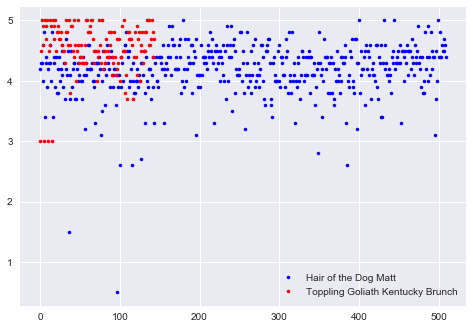

In [44]:
# Examining two beers ratings
_ = plt.plot(master_df['Hair of the Dog Matt'], '.', color='blue')
_ = plt.plot(master_df['Toppling Goliath Kentucky Brunch'], '.', color='red')
_ = plt.legend()
plt.show()

/Users/joelelster/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


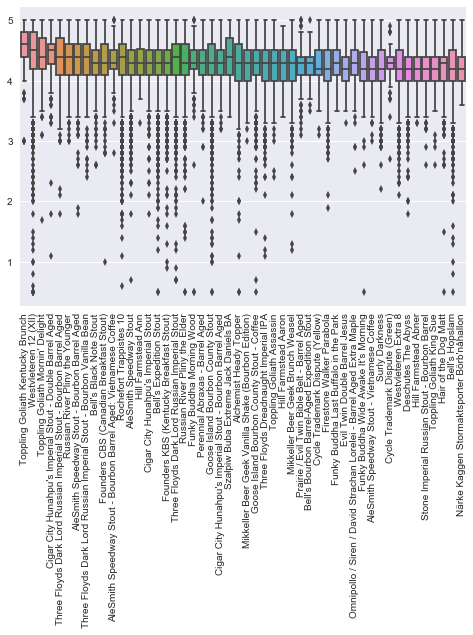

In [45]:
# Making Seaborn boxplots for reviews of all beers

_ = sns.boxplot(master_df)
_ = plt.xticks(rotation=90)
plt.show()

In [46]:
# Now we can test for normal values- starting with Toppling Goliath Assassin

normaltest(master_df['Toppling Goliath Assassin'].dropna())

NormaltestResult(statistic=69.575674417947283, pvalue=7.7953256540067005e-16)

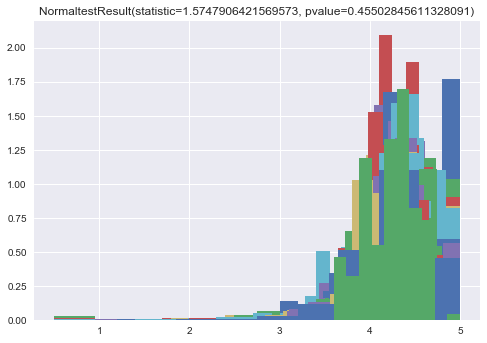

In [47]:
# Making brief histograms of all beers, plotted together as quick and dirty look

for x in master_df.columns:
    beer_array = (master_df[x].dropna())
    _ = plt.hist(beer_array, normed=True)
    _ = plt.title(normaltest(beer_array))
plt.show()

# The preliminary data suggests that the data is NOT normally distributed for two main reasons:
1. The increments in the rating system do not make it approximate a continous variable
2. There is a long tail on the left side, but none on the right side, skewing the data and not allowing it to be distributed normally

In [48]:
# Bringing in perason_r tests for later use- looking at covariance

def pearson_r(x,y): 
    ''' determing how related two datasets are: 
    covariance/((std of x) * (std of y))'''
    cor_matrix = np.corrcoef(x,y)
    return round(float(cor_matrix[1,0]),3)

In [49]:
# Bringing in ECDF (Empirical Cumulative Distribution Function) to check for normality of distribution

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    return np.sort(data), (np.arange(1, 1+ (len(data))) / (len(data)))

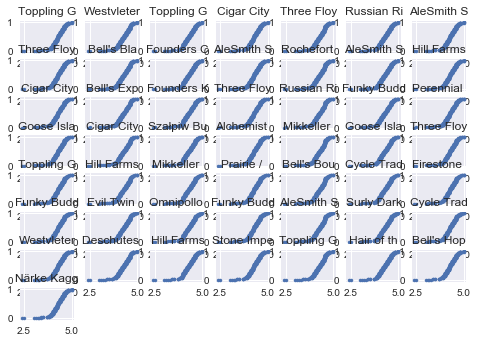

In [50]:
# Taking/plotting ECDFs of all beers

for num, name in enumerate(master_df.columns):
    plt.subplot(8,7,num+1)
    x, y = ecdf(master_df['Toppling Goliath Assassin'].dropna())
    _ = plt.plot(x,y,'.')
    _ = plt.title(name[0:10])
plt.show()

# All of the beers have very long left hand tails and little/no tail on the right side as expected.
Could glean a little information from it, but it seems as if the distributions will not say a lot

In [770]:
# Checking information
master_df.describe()

,Toppling Goliath Kentucky Brunch,Westvleteren 12 (XII),Toppling Goliath Mornin' Delight,Cigar City Hunahpu's Imperial Stout - Double Barrel Aged,Three Floyds Dark Lord Russian Imperial Stout - Bourbon Barrel Aged,Russian River Pliny the Younger,AleSmith Speedway Stout - Bourbon Barrel Aged,Three Floyds Dark Lord Russian Imperial Stout - Bourbon Vanilla Bean,Bell's Black Note Stout,Founders CBS (Canadian Breakfast Stout),...,Surly Darkness,Cycle Trademark Dispute (Green),Westvleteren Extra 8,Deschutes The Abyss,Hill Farmstead Abner,Stone Imperial Russian Stout - Bourbon Barrel,Toppling Goliath King Sue,Hair of the Dog Matt,Bell's Hopslam,Närke Kaggen Stormaktsporter Börb'nåhallon
count,144.000000,3956.000000,239.000000,328.000000,429.000000,787.000000,883.000000,440.000000,997.000000,1010.000000,...,1109.000000,94.000000,2161.000000,1716.000000,409.000000,468.000000,223.000000,510.000000,2947.000000,156.000000
mean,4.551389,4.447497,4.422594,4.412500,4.362704,4.377382,4.338732,4.355682,4.319258,4.324257,...,4.215329,4.268085,4.211337,4.211364,4.227384,4.209188,4.217489,4.192941,4.223108,4.214744
std,0.405208,0.475537,0.397249,0.417282,0.453603,0.362556,0.389161,0.420559,0.352288,0.383267,...,0.375081,0.305228,0.387389,0.369925,0.324767,0.349887,0.371519,0.429864,0.434586,0.277501
min,3.000000,0.500000,1.700000,1.100000,1.800000,3.000000,1.800000,2.400000,2.600000,1.000000,...,2.200000,2.700000,2.100000,1.800000,3.300000,2.600000,2.600000,0.500000,0.500000,3.600000
25%,4.400000,4.200000,4.200000,4.275000,4.100000,4.100000,4.100000,4.100000,4.100000,4.100000,...,4.000000,4.200000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,4.600000,4.500000,4.400000,4.500000,4.400000,4.400000,4.400000,4.400000,4.300000,4.300000,...,4.200000,4.300000,4.200000,4.200000,4.200000,4.200000,4.200000,4.300000,4.200000,4.200000
75%,4.800000,4.800000,4.700000,4.600000,4.700000,4.600000,4.600000,4.600000,4.500000,4.600000,...,4.500000,4.400000,4.500000,4.400000,4.400000,4.400000,4.400000,4.400000,4.500000,4.400000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Potential additional directions to take:

- How to recreate rankings 1-50 based off this information and see how it stacks up to ratebeer.com

- Whether higher std is indicative of a higher average, or whether certain beers are in a tighter rating agreement 


# On to the text of the reviews

In [772]:
# To be run w/ below, clear reviews_dict so only want to initalize once

# Take reviews from beer
# initialize empty dict

# reviews_dict = {}

In [ ]:
# Iterate through Beers, scrape reviews into list, and to dict as dict[beer] = reviews


## catch errors, list of beers in dict, and list of urls that led to error

corrupt_list = []
in_list = []
url_bad_list = []

# create key as stripped name for each beer

for num, link in enumerate(beer_df.Link):
    
    # format Beer name, initialize empty temp df, set i = 0, and incrementing i by 1 for each successfull loop
    
    beer_name = beer_df.iloc[num].Name 
    beer_name =(beer_name.replace(" ",''))
    beer_name =(beer_name.replace("'", ''))
    beer_name =(beer_name.replace("-", ''))
    beer_name =(beer_name.replace("(", ''))
    beer_name =(beer_name.replace(")", ''))
    beer_name =(beer_name.replace("/", ''))
    beer_name =(beer_name.replace(":", ''))
    #print(beer_name, 'initializing: num ', num + 1)

    # value will be text of reviews of iteration
    # initialize empty list, set iterator at 1
    
    values = []
    i = 1
    
    # Check to see if beer review is already in the dict before scraping
    if beer_name in reviews_dict:
        print(beer_name, 'in reviews_dict')
        in_list.append(beer_name)
    
    else:
        # While reviews are still being read, extract reviews (via prev function) and add them to an intermediate list
        # list then adds to dictionary as value; beername is key
        print(beer_name, num, 'initializing')
        
        # because url starts as base/1/1/, want to increment the last number until all reviews are grabbed
        while i < 10000: # can trigger to turn condition false when scraped data is empty (end of reviews)
            
            # setting url so it can be iterated over
            url = ('{0}1/{1}/'.format(link, i))

            # extracting list of ratings, then iterate over page to add each to a larger list 
           try:
                ratings_list = review_text_from_url(url)

                for num, review in enumerate(ratings_list):
                    values.append(review)

                # Increment i, if no more reviews increment 10000 (breaks loop)
                i +=1
                if len(ratings_list) == 0:
                    i += 100000
                # To make sure the process is still going
                if i % 301 == 0:
                    print(len(values), 'ratings for', beer_name)
            
            # Catch errors, sometimes there is an error with the HTTP request
            except:
                print('error:', beer_name, i)
                print(url)
                
                # When we know a review isnt complete, we can add it to the corrupt_list to delete later
                corrupt_list.append(beer_name)
                url_bad_list.append(url)
                i += 1
        reviews_dict[beer_name] = values
        
       
    
# Clean out errors. May want to inspect first before deletion

for i in corrupt_list:
    del reviews_dict[i]
print('Errors:',corrupt_list)

# getting rid of formatting leftover from http

for key in reviews_dict.keys():
    reviews = (reviews_dict[key]) 
    for i in range(len(reviews)):
        reviews[i] = reviews[i].split('</div')[0]
    #reviews_dict['TopplingGoliathKentuckyBrunch'])[i].split('</div')[0]

In [773]:
# Now we will save the reviews_dict as a json file so we can import the data the next time

import json

In [ ]:
# save as json file

json.dump(reviews_dict, './Files/beer_reviews.json')

In [774]:
# Reading back from saved json file

json_data = open('./Files/beer_reviews.json').read()
reviews_dict = json.loads(json_data)

# Sentiment Analysis

## Part 1 -  Tokens

In [940]:
# Import Natural Language Toolkit

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [777]:
# Create tokenizer. This splits each string into a list of words
tokenizer = RegexpTokenizer('\w+') # all words

# Create tokens, this one on the first review of the first beer
tokens = tokenizer.tokenize(str([str(i).lower() for i in reviews_dict.values()]))
tokens[:5]

['o', 'styleo', 'styleo', 'styleo', 'styleo']

In [67]:
# Token filtering. We do not care about meaningless words or pronouns

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joelelster/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Create list of stop words, and add 'updated' as well
sw = nltk.corpus.stopwords.words('english')

# add 
sw.append('updated')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [69]:
# Create a list of tokens that arent stop words

words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in tokens:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['styleo', 'styleo', 'styleo', 'styleo', 'styleo']

In [778]:
# We will count the tokens using Counter

from collections import Counter

In [789]:
# Function time: Find the word frequency for particular beer

def word_freq(beer_name, addl_stopwords=[], num=25):
    '''input beer_name and return a count of the words
    beer_name: the name of the beer in question
    addl_stopwords: list of words to be excluded from the plot
    to_plot: how many words should be plotted
    '''
    # Create tokenizer for all words
    tokenizer = RegexpTokenizer('\w+')

    # Create tokens
    tokens = tokenizer.tokenize(str([str(i).lower() for i in reviews_dict[beer_name]]))
    
    # Create list of stop words  
    sw = nltk.corpus.stopwords.words('english')
    sw.append('updated')
    sw.append('head')
    sw.append('beer')
    sw.append('w')
    sw.append('z')
    sw.append('r')
    sw.append('n')

    # argument to append additional words
    addl_stopwords = list(addl_stopwords)
    
    for word in addl_stopwords:
        sw.append(word)
    
    # all words that are in tokens but not in sw
    cleaned_tokens = []
    for word in tokens:
        if word not in sw:
            cleaned_tokens.append(word)
            
    
    most_common = Counter(cleaned_tokens).most_common(num)
    
    return most_common

In [786]:
# Lets test it out by printing the count of words in 'TopplingGoliathKentuckyBrunch'

print('TopplingGoliathKentuckyBrunch')
print(word_freq('TopplingGoliathKentuckyBrunch')[:5])
print(word_freq('TopplingGoliathKentuckyBrunch', addl_stopwords=['coffee', 'chocolate'])[:5])

TopplingGoliathKentuckyBrunch
[('coffee', 82), ('chocolate', 65), ('maple', 55), ('dark', 53), ('bourbon', 46)]
[('maple', 55), ('dark', 53), ('bourbon', 46), ('vanilla', 45), ('bottle', 41)]


In [790]:
# For greater versitility, we can tweak it to be able to work on any text string or list

def word_freq_from_text(text, addl_stopwords=[], num=25):
    '''input text and return a count of the words
    text: is casted as string and tokenized
    addl_stopwords: list of words to be excluded from the plot- must be in square brackets []
    num: how many words should be plotted
    '''
    # Create tokenizer for all words
    tokenizer = RegexpTokenizer('\w+')

    # Create tokens
    tokens = tokenizer.tokenize(str(text).lower())
    
    # Create list of stop words  
    sw = nltk.corpus.stopwords.words('english')
    extra_sw = ['updated', 'head', 'beer','w', 'z', 'r','n']
    [sw.append(i) for i in extra_sw]

    # argument to append additional words
    addl_stopwords = list(addl_stopwords)
    [sw.append(i) for i in addl_stopwords]
    
    # all words that are in tokens but not in sw
    cleaned_tokens = []
    for word in tokens:
        if word not in sw:
            cleaned_tokens.append(word)
            
    
    # Create list of count of cleaned tokens, return specified paramter (top 25 by default)
    most_common = Counter(cleaned_tokens).most_common(num)
    
    return most_common

In [791]:
# Test it out

sample_sentence = 'This BEER was much too HOPS HEAVY for me to taste the essence of the delicious hops!'
sample_sentence2 = 'TASTY DELICIOUS BEER? YES!!! HOPS CAME THROUGH, light caramel flavor LIGHT beer.'

print(sample_sentence)
print(word_freq_from_text(sample_sentence))

print(sample_sentence2)
print(word_freq_from_text(sample_sentence2))

This BEER was much too HOPS HEAVY for me to taste the essence of the delicious hops!
[('hops', 2), ('much', 1), ('heavy', 1), ('taste', 1), ('essence', 1), ('delicious', 1)]
TASTY DELICIOUS BEER? YES!!! HOPS CAME THROUGH, light caramel flavor LIGHT beer.
[('light', 2), ('tasty', 1), ('delicious', 1), ('yes', 1), ('hops', 1), ('came', 1), ('caramel', 1), ('flavor', 1)]


In [792]:
# Now we can take easily take the count of all the words in all the reviews

# using text of all reviews as input (all_reviews_score_dict.values())
word_freq_from_text(all_reviews_score_dict.values())

[('aroma', 4660),
 ('dark', 3789),
 ('bottle', 3447),
 ('sweet', 3341),
 ('taste', 2964),
 ('hops', 2800),
 ('nice', 2698),
 ('flavor', 2698),
 ('brown', 2635),
 ('chocolate', 2567),
 ('finish', 2415),
 ('pours', 2364),
 ('malt', 2243),
 ('bitter', 2229),
 ('good', 2217),
 ('alcohol', 2206),
 ('citrus', 1975),
 ('light', 1961),
 ('one', 1935),
 ('well', 1929),
 ('white', 1880),
 ('like', 1757),
 ('caramel', 1755),
 ('medium', 1687),
 ('great', 1674)]

# Sample test case- Coors light

In [797]:
# grabbing frequency of words for coors light

coors_dict = {}
# Scraping the first 
i = 1
while i < 10000:
    # for up to first 10,000 pages of reviews
    coors_url = 'https://www.ratebeer.com/beer/coors-light/707/1/{}/'.format(i)
    
    # Grab fresh page of reviews (returns dict of count of reviews)
    fresh = word_freq_from_text(review_text_from_url(coors_url))
    
    # If word is in the dictionary already, increment new instances. Otherwise place in dict with value as instances
    for word, freq in fresh:
        if word in coors_dict:
            coors_dict[word] += freq
        else:
            coors_dict[word] = freq
            
    # increment i
    if len(fresh) < 1:
        i += 10000
    else:
        i += 1
    
    # To monitor progress, print updates after 100 pages scraped
    if i % 100 == 0:
        print(i, 'pages')

# Print total number of pages of reviews
print(i-10000, 'pages scraped')

100 pages
200 pages
300 pages


In [834]:
# lets see the results

# creating total number of words
total = 0
for num in coors_dict.values():
    total += num

# We will take the frequency of the words. Need to swap keys and vals first so we can sort it
inverse = [(round(value/total, 3), key) for key, value in coors_dict.items()]
inverse = (sorted(inverse, reverse=True))
inverse

[(0.059, 'light'),
 (0.038, 'water'),
 (0.032, 'taste'),
 (0.032, 'like'),
 (0.02, 'drink')]

# Now we can utilize the test case to do the above for any beer

In [917]:
# Run entire process from base url

def review_from_url_profile_test(url, num=10, pct=True):
    '''
    Takes url from ratebeer.com (ie 'https://www.ratebeer.com/beer/bruery-terreux-tart-of-darkness/145153/')
    returns the 30 most common words in reviews
    '''
    # Initialize empty dict of words
    results = {}
    
    # initialize i
    i = 1
    reviews = 0

    
    # Like above, grab 
    while i < 3000:
        
        # generate fresh list of review count (tokenized by function) based off url. 
        beer_url = ('{0}1/{1}/'.format(url,i))
        fresh_raw = (review_text_from_url(beer_url))
        len_reviews = len(fresh_raw)
        fresh = word_freq_from_text(fresh_raw)
        
        # create end of iterator, will come into effect when no reviews are left
        if len_reviews < 3:
            i += 3000
        
        else:
            # iterate over fresh check to see if each word is already in the results dict
            for word, freq in fresh:
                
                if word in results: # increment the results entry by the frequency of the page
                    results[word] += freq
                else: # create the entry and give it value of the frequency
                    results[word] = freq
        
        # iterate i so it can loop over all reviews 
        i += 1
        reviews += len_reviews
    
    # Now as above, we invert the dict, sort it, and grab the first x number of words
    # pct as paramater, shows instances of word/review
    if pct == True:
        inverse = [(round((value/reviews),4), key) for key, value in results.items()]
    else:
        inverse = [(value, key) for key, value in results.items()]
    inverse = (sorted(inverse, reverse=True))
    final = inverse[0:num] 
    
    # See how many pages of reviews were scraped
    print(reviews, 'reviews')

    return final

In [904]:
# Using a different strategy here, instead of dicts of dicts and adding, we will turn all into text and use Counter

def review_from_url_profile(url, num=10, pct=True):
    '''
    Takes url from ratebeer.com (ie 'https://www.ratebeer.com/beer/bruery-terreux-tart-of-darkness/145153/')
    returns the 30 most common words in reviews
    
    '''
    # Initialize empty list of words, and of total reviews
    cleaned_tokens = []
    reviews = 0
    
    # initialize i
    i = 1
    
    while i < 3000:
        # generate fresh list of review count, turn into a string so it could be tokenized
        fresh_raw = (review_text_from_url('{0}1/{1}/'.format(url,i)))
        len_reviews = len(fresh_raw)
        fresh = str(fresh_raw).lower()
        
        # create end of iterator
        if len_reviews < 3:
            i += 3000
            
        else:
            # Create smaller list so we can clean and tokenize words, then add to larger list
            tokens = tokenizer.tokenize(fresh)
            for word in tokens:
                if word not in sw:
                    cleaned_tokens.append(word)
        i += 1
        reviews += len_reviews
        
    # Using Counter to count the reviews instead of incrementing dicts, this should save time
    result = Counter(cleaned_tokens).most_common(num)
    
    # Make percentage of the words a paramater, of instances of word/review
    if pct == True:
        result = [(key, round((value/reviews),4)) for key, value in result]
    else:
        
    print(reviews, 'reviews')
    
    return result

In [ ]:
# Testing them both out. While the results are not exactly the same, they are close enough 
# Additionally, you may notice the second style runs slightly faster

In [918]:
review_from_url_profile_test('https://www.ratebeer.com/beer/bruery-terreux-tart-of-darkness/145153/', pct=True)

338 reviews


[(1.2515, 'sour'),
 (0.7337, 'dark'),
 (0.6568, 'tart'),
 (0.432, 'aroma'),
 (0.3964, 'bottle'),
 (0.3521, 'light'),
 (0.3047, 'brown'),
 (0.3047, 'black'),
 (0.2811, 'taste'),
 (0.2604, 'pours')]

In [916]:
review_from_url_profile('https://www.ratebeer.com/beer/bruery-terreux-tart-of-darkness/145153/', pct=True)

338 reviews


[('sour', 1.2633),
 ('dark', 0.7544),
 ('tart', 0.6864),
 ('head', 0.642),
 ('aroma', 0.5),
 ('beer', 0.4615),
 ('bottle', 0.4586),
 ('light', 0.4112),
 ('brown', 0.3994),
 ('black', 0.3905)]

# Sentiment Analysis 
## Part 2: Sentiment and Test/Train sets

In [919]:
# We will use textblob for this, as it is simple and fast

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [925]:
# We can use the preset sentiment to see how positive/ negative textblob thinks the reviews are

# Lets try 4 statements and see how it goes. 
# We expect statement 1 and 4 to be good, 2 to be negative, and 3 to be neutral/positive
stmt1 = 'Fantastic beer, delicious and great'
stmt2 = 'Not worth the hype, would not wait to try this beer again. Bad experience'
stmt3 = 'Very hop heavy and a bit too light. Would prefer something stronger but overall solid'
stmt4 = 'Good head, good aroma, drank out of snifter, dark chocolate flavor nailed it on the head'


# Grabbing the sentiment
sentiment1 = TextBlob(stmt1)
sentiment2 = TextBlob(stmt2)
sentiment3 = TextBlob(stmt3)
sentiment4 = TextBlob(stmt4)

# Seeing the results
print("stmt1 Sentiment Score:", sentiment1.sentiment.polarity)  
print("stmt2 Sentiment Score:", sentiment2.sentiment.polarity)  
print("stmt3 Sentiment Score:", sentiment3.sentiment.polarity) 
print("stmt4 Sentiment Score:", sentiment4.sentiment.polarity)  

stmt1 Sentiment Score: 0.7333333333333334
stmt2 Sentiment Score: -0.42499999999999993
stmt3 Sentiment Score: 0.08
stmt4 Sentiment Score: 0.4166666666666667


In [933]:
# Now lets try to take the sentiment of every 7th beer

beers_dict_keys = list(reviews_dict.keys())
for i in list(beers_dict_keys)[::7]:
    statement = str(reviews_dict[i])
    sentiment = TextBlob(statement)
    print(sentiment.sentiment.polarity, ": Sentiment Score for {}".format(i))  # Result = 1.0

0.17624238733346176 : Sentiment Score for TopplingGoliathKentuckyBrunch
0.17166558464277437 : Sentiment Score for AleSmithSpeedwayStoutBourbonBarrelAged
0.15441352347922263 : Sentiment Score for CigarCityHunahpusImperialStout
0.15581202767709762 : Sentiment Score for GooseIslandBourbonCountyStout
0.23098640493150419 : Sentiment Score for ThreeFloydsDreadnaughtImperialIPA
0.16795552931916577 : Sentiment Score for OmnipolloSirenDavidStrachanLoreleiBarrelAgedExtraMaple
0.16398438994071537 : Sentiment Score for CycleTrademarkDisputeGreen
0.1642702497972222 : Sentiment Score for HairoftheDogMatt


# Yikes, this does not appear to have any correlation to a beers rating. We will need to retrain the system

## We will need to train the system by giving examples of positive and negative reviews

### So we need to grab a list of positive reviews (> 4.5 or so), and negative reviews (< 3.5 or so)

In [956]:
# Stratifying reviews by overall rating

def ratings_reviews_dict(url):
    '''
    input is url, output is dict of ratings grouped by rating
    '''
    # initalize empty dict 
    rating_review_dict = {}
    
    # create reviewer_info, a list of each field
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    reviews = soup.find('div', class_='reviews-container')
    reviewer_info = reviews.find('div').get_text(separator='^').split('^')
    
    # process reviewer_info. We want to get rid of items that do we want to delete as reviewer_info has extra items inserted
    new_review = []
    
    #iterated through reviewer_info and appending 'cleaned' reviews to a 'clean' list
    for num,text in enumerate(reviewer_info):
        review = reviewer_info[num]
        if ('UPDATED:' in review):
            pass
        elif 'does not count' in review:
            pass
        elif (review == '\n'):
            pass
        elif review == ' ':
            pass
        elif "[email" in review:
            pass
        else:
            new_review.append(review)
   
    # create reviews dict. Note: the rating is the 0th item, the review is the 3rd and sometimes 4th item (mult paragraphs)
    i = 0
    
    # taking ith, i+3rd/i+4th info when i is a rating
    for x in range(len(new_review)):
        
        rating = []
        review = []
        
        try: # this checks if the ith element is a rating. if it is not, it will go to the except block
            rating = float(new_review[i])
            
            try: # because as it iterates through, the i+3rd element may result in an indexerror
                review.append(new_review[i+3])
                
                # we want to add the i+3 and occasionally i+4 to the rating list
                try: # same principle with an addendum. The i+4 is either part of the review (>3 chars) or a rating (3 chars)
                    if len(new_review[i+4]) > 3:
                        review.append(new_review[i+4])
                except IndexError:
                    pass
            
            except IndexError:
                pass
            
            
            # If the rating (ie 4.5) is already in the dict, add the review to dict[rating], else initialize it
            if rating in rating_review_dict:
                rating_review_dict[rating].append(review)
            else:
                rating_review_dict[rating] = review
                
            # cant forget to increment i
            i += 1

        # if i is not a rating we want to keep iterating
        except ValueError:
            i += 1
        
    return rating_review_dict

In [952]:
# testing it out

ratings_reviews_dict('https://www.ratebeer.com/beer/russian-river-pliny-the-younger/43181/1/1/')

{3.7: ['Dark copper color with a thick head. Aroma is of fresh hops, pine, mango, apricot, and citrus. Has a carbonated palate. Flavor is of malts, booze, hops, citrus, and some bitterness. Leaves a hoppy finish. Still a little hot.  '],
 4.0: ["Draft at O'Brien's. Pours almost clear gold with a bubbly off white head. Tastes like caramel malt, grapefruit hops, a hint of pine, a hint of resin, a hint of honey, and some smooth booze. Light/medium body and carbonation. Smells like caramel malt, grapefruit and pine hops, resin, and smooth booze. "],
 4.1: [' Sf. Pours hazy golden with foamy white head. Earthy, citrusy fruity hop profile, clean crisp malt flavors. High hop bitterness. Medium body, smooth texture, moderate carbonation. '],
 4.2: ['@ Toronado, Dan Diego 18-2-19: Mycket trevlig frukt och humle - ingen smakbomb, men den har en underbar och mjuk balans. Den är så elegant.  ',
  ['Tap @Ben & Nicks Bar in Oakland. Heavy scent of sweet exotic fruits and sour passion fruit. Full-bod

In [979]:
# Now we can iterate through links, and apply the ratings_review_dict function to each iteration
# We will try it out with Pliny the Younger


# Initalize empty dict
pliny_review_dict = {}

# For the test concept, we do not care if we have the complete ratings
for i in range (1,90):
    url = 'https://www.ratebeer.com/beer/russian-river-pliny-the-younger/43181/1/{}/'.format(i)
    
    # create intermediate dict, then add the intermediate dict to the larger dict (pliny_review_dict)
    int_dict = ratings_reviews_dict(url)
    
    # Iterate through the intermediate dict to initalize or add ratings
    for key in int_dict:
        if key in pliny_review_dict:
            pliny_review_dict[key].append(int_dict[key])
        else:
            pliny_review_dict[key] = int_dict[key]

In [980]:
# Test to see if it worked

print(5.0 in pliny_review_dict)
pliny_review_dict[5.0][:3]

True


['Yammmmy)))) very very very tasty! Its made my evening! Recomendaition yammmmmy\n\n---Rated via Beer Buddy for iPhone ',
 ['Very long flavour, balanced malt&hops. Lingering bitterness. Great triple IPA. '],
 ['Little variation?s each year, but for 2016 the super aroma is back! Less of the typical DIPA bite this year, so its real easy on the palate which I appreciate. The belch has great danky aroma in case you missed it the first time down.  Great balance. Perfection. Shines with a golden Aura that this beer really is magical!  ',
  ['On tap at beechwood a while back. Dark copper pour very carbonated to bring out awesome huge hoppy aromas of pine mango apricot and all other hoppy goodness. Lightly malted with some alcohol heat but hops prevail. Not super duper bitter just great use of hops. a+++ '],
  ['The ultimate!! Waited in line for 6 hours to sample this nectar of the beer gods. It did not disappoint. Unbelievable balance considering the APV. From start to finish and then some th

In [981]:
# Continuing with the Pliny test

# We need to create train and test values
# Idea is to take a list of marked postive and a list of marked negative values
# We split about 75% of them into the training set, and 25% into the test set
# We then teach the system based off the training set, and test it against the test set (which was not involved in learning)

In [1071]:
# paramaters: 3-4.1 is a negative review, 4.3-5 is a positive review (there werent enough reviews lower)

neg = []
for i in range(0,41):
    rating = i/10
    if rating in pliny_review_dict:
        for i in pliny_review_dict[rating]:
            neg.append([i, 'neg'])
        
pos = []
for i in range(48,51):
    rating = i/10
    if rating in pliny_review_dict:
        for i in pliny_review_dict[rating]:
            pos.append([i, 'pos'])

In [1007]:
print('neg:', len(neg))
print('pos:', len(pos))

neg: 110
pos: 97


In [1023]:
# We now split up the negative and positive reviews into train and test
test = []
train = []
for i,x in enumerate(neg):
    if i < 78:
        train.append([str(x[0]), x[1]])
    else:
        test.append([str(x[0]), x[1]])
        
for i,x in enumerate(pos):
    if i < 78:
        train.append([str(x[0]), x[1]])
    else:
        test.append([str(x[0]), x[1]])
        
print('train:', len(train))
print('test:', len(test))
print('% train:', len(train) / (len(train) + len(test)))

train: 156
test: 51
% train: 0.7536231884057971


In [1024]:
#classifier. We are training the classifier based off the training data we have

cl = NaiveBayesClassifier(train)

In [1037]:
# Now we can test for accuracy with our test set

cl.accuracy(test)

0.8235294117647058

# Awesome -- Now we can grab the reviews of ALL beers and train it on more data

In [1049]:
# to be run with box below, but not repeated as it overwrites data

all_reviews_score_dict = {}
beers_added = []

In [ ]:
# iterates through beers, scrapes reviews, and adds to massive dict of ratings 

# initalize empty dict, and markers for helping errors if they arise
page_on = 0
error_list = []

# iterating through all links in beer_df
for num,link in enumerate(beer_df.Link): 
    name = beer_df.Name[num]
    
    # This step prevents us from scraping data we have already scraped
    if name in beers_added:
        print(name, 'already added')
    
    # Otherwise, print the name/number of beer(for tracking), and run through the int_dict as above
    else:
        print(num+1, beer_df.Name[num])
        i = 1
        while i < 10000:
            formatted_link = '{0}1/{1}/'.format(link,i)
            try: 
                int_dict = ratings_reviews_dict(formatted_link)
                
                # while still grabbing info
                if len(int_dict) > 0:
                    for key in int_dict:
                        if key in all_reviews_score_dict:
                            all_reviews_score_dict[key].append(int_dict[key])
                        else:
                            all_reviews_score_dict[key] = int_dict[key]
                    i += 1
                    page_on = i
                
                # if all info grabbed
                else:
                    i += 10000
                    page_on = i
                    beers_added.append(name)
            
            # in case of error, keep iterating, but add the beer name and page to the error list
            except: #HTTPError
                i +=1
                error_list.append([name, i])

Toppling Goliath Kentucky Brunch already added
Westvleteren 12 (XII) already added
Toppling Goliath Mornin' Delight already added
Cigar City Hunahpu's Imperial Stout - Double Barrel Aged already added
Three Floyds Dark Lord Russian Imperial Stout - Bourbon Barrel Aged already added
Russian River Pliny the Younger already added
Three Floyds Dark Lord Russian Imperial Stout - Bourbon Vanilla Bean already added
AleSmith Speedway Stout - Bourbon Barrel Aged already added
Bell's Black Note Stout already added
Founders CBS (Canadian Breakfast Stout) already added
Rochefort Trappistes 10 already added
AleSmith Speedway Stout - Bourbon Barrel Aged: Vietnamese Coffee already added
AleSmith Speedway Stout already added
Hill Farmstead Ann already added
Cigar City Hunahpu's Imperial Stout already added
Founders KBS (Kentucky Breakfast Stout) already added
Three Floyds Dark Lord Russian Imperial Stout already added
Bell's Expedition Stout already added
19 Russian River Pliny the Elder
20 Funky Budd

## Check the error list
error_list

In [1045]:
# save all reviews score dict so we dont need to scrape again if we run into an error/reload the page
json.dump(all_reviews_score_dict, 'all_reviews_score_dict.json')

{}

In [ ]:
# Reading back from saved json file

json_data = open('all_reviews_score_dict.json').read()
all_reviews_score_dict = json.loads(json_data)

In [1166]:
# Time to split back into negative and positive groups

neg = []
for i in range(0,35):
    rating = i/10
    if rating in all_reviews_score_dict:
        for i in all_reviews_score_dict[rating]:
            neg.append([i, 'neg'])
        
pos = []
for i in range(49,51):
    rating = i/10
    if rating in all_reviews_score_dict:
        for i in all_reviews_score_dict[rating]:
            pos.append([i, 'pos'])

neg_len = len(neg)
pos_len = len(pos)
print('neg length',neg_len)
print('pos length', pos_len)

neg length 641
pos length 1544


In [1167]:
# Here we will use a cutoff of 80% since we have larger samples. 80% to train, %20 to test 

neg_80pct = neg_len * 0.8
pos_80pct = pos_len * 0.8

train = []
test = []

# above we calculated the location of the 80% mark. If the location is under that mark, train, otherwise test

for i,x in enumerate(neg):
    if i < neg_80pct:
        train.append([str(x[0]), x[1]])
    else:
        test.append([x[0][0], x[1]])
        
for i,x in enumerate(pos):
    if i < pos_80pct:
        train.append([str(x[0]), x[1]])
    else:
        test.append([x[0][0], x[1]])
        
print(len(train))
print(len(test))

1749
436


In [1169]:
# Now we want to retrain on the updated list, and print accuracy

cl = NaiveBayesClassifier(train)
print(cl.accuracy(test))

cl completed. Making test
0.6307339449541285


In [ ]:
# We can also breakdown the percent positive reviews for each available rating of the beers

scores_dict = {}

# If the rating exists, iterate through all reviews, and return the %pos rating
for i in range (1,51):
    pos = 0
    neg = 0
    rating = i/10
    
    try:
        for x in all_reviews_score_dict[rating]:
            sentiment = cl.classify(x[0])
            
            if sentiment == 'pos':
                pos +=1
            elif sentiment == 'neg':
                neg +=1
            
            score = pos/np.sum(pos + neg)
            scores_dict[rating] = score
    
    # If the rating doesnt exist, it will raise a KeyError
    except KeyError:
        pass

In [624]:
# Time to examine

scores_dict

{0.5: 0.0,
 0.8: 0.0,
 1.0: 0.0,
 1.3: 0.0,
 1.4: 0.0,
 1.5: 0.0,
 1.6: 0.0,
 1.8: 0.0,
 2.0: 0.25,
 2.1: 0.5,
 2.3: 0.5,
 2.4: 0.0,
 2.5: 0.33333333333333331,
 2.6: 0.16666666666666666,
 2.7: 0.29999999999999999,
 2.8: 0.41666666666666669,
 2.9: 0.125,
 3.0: 0.32000000000000001,
 3.1: 0.15384615384615385,
 3.2: 0.36666666666666664,
 3.3: 0.18421052631578946,
 3.4: 0.042253521126760563,
 3.5: 0.25531914893617019,
 3.6: 0.17164179104477612,
 3.7: 0.18974358974358974,
 3.8: 0.19424460431654678,
 3.9: 0.18393782383419688,
 4.0: 0.18320610687022901,
 4.1: 0.20795660036166366,
 4.2: 0.2756183745583039,
 4.3: 0.30347349177330896,
 4.4: 0.3364485981308411,
 4.5: 0.4089935760171306,
 4.6: 0.38681948424068768,
 4.7: 0.52430555555555558,
 4.8: 0.58375634517766495,
 4.9: 0.53333333333333333,
 5.0: 0.7142857142857143}

In [625]:
beer_review_bd = {}
beers_added = []

In [1052]:
# Now we can look at each beer and check which have the highest accuracy of positive/negative review
# Similar to above, but it will be a dict[dict_beer[rating_dist]] rather than dict_all[rating_dist]
# the key will be the beer, and the value a dict of the reviews and corresponding rating
# previously the key was the rating, and the value the reviews

# For errors
page_on = 0
error_list = []

for num,link in enumerate(beer_df.Link): 
    name = beer_df.Name[num]
    
    # skip if we already have scraped the data
    if name in beer_review_bd:
        print(name, 'already added')
    
    # Otherwise create a dict of rating/values, and add that to the larger dict w/ the beer_name as key
    else:
        beer_dict = {}
        print(num+1, beer_df.Name[num])
        
        i = 1
        while i < 10000:
            formatted_link = '{0}1/{1}/'.format(link,i)
            
            # try/except to avoid random HTTP Errors
            try:      
                int_dict = ratings_reviews_dict(formatted_link)
                
                if len(int_dict) > 0:
                    # add to the int_dict
                    for key in int_dict:
                        if key in beer_dict:
                            beer_dict[key].append(int_dict[key])
                        else:
                            beer_dict[key] = int_dict[key]
                    
                    # set page_on and increment i  
                    page_on = i
                    i += 1
                
                # if no more reviews, break loop, add beer_dict to larger dict, and add bame to list of added
                else:
                    i += 10000
                    page_on = i
                    beer_review_bd[name] = beer_dict
                    beers_added.append(name)
            
            # If there is an error, skip, increment i, and note the error
            except Error: # HTTPError
                i +=1
                error_list.append([name, i])
                print('error', name, i)

Toppling Goliath Kentucky Brunch already added
Westvleteren 12 (XII) already added
Toppling Goliath Mornin' Delight already added
Cigar City Hunahpu's Imperial Stout - Double Barrel Aged already added
Three Floyds Dark Lord Russian Imperial Stout - Bourbon Barrel Aged already added
Russian River Pliny the Younger already added
Three Floyds Dark Lord Russian Imperial Stout - Bourbon Vanilla Bean already added
AleSmith Speedway Stout - Bourbon Barrel Aged already added
Bell's Black Note Stout already added
Founders CBS (Canadian Breakfast Stout) already added
Rochefort Trappistes 10 already added
AleSmith Speedway Stout - Bourbon Barrel Aged: Vietnamese Coffee already added
AleSmith Speedway Stout already added
Hill Farmstead Ann already added
Cigar City Hunahpu's Imperial Stout already added
Founders KBS (Kentucky Breakfast Stout) already added
Three Floyds Dark Lord Russian Imperial Stout already added
Bell's Expedition Stout already added
Russian River Pliny the Elder already added
Fu

In [1053]:
# check error_list
error_list

[]

In [1056]:
# Save file w/ json, since it was a dict of dicts the formatting is different

with open('./Files/beer_review_bd.json', 'w') as fp:
    json.dump(beer_review_bd, fp)

In [1062]:
# reinitialize

json_data = open('./Files/beer_review_bd.json').read()
beer_review_bd = json.loads(json_data)

In [736]:
# training each beer review to see internal accuracy

for key in beer_review_bd.keys():
    # defining terms
    print(key)
    
    # reviews = beer specific reviews (as dict)
    df = beer_review_bd
    reviews = df[key]
    
    # starting analysis- creating neg and pos groups
    neg = []
    pos = []
    
    # determining cutoffs- taking 20 % of max and min
    all_ratings = 0
    
    #finding the number of ratings
    for x in reviews.values():
        all_ratings += len(x)
        
    # Threshold of which reviews to grab
    thresh = all_ratings * 0.25 # top 25 and bottom 25. # Can be made paramter to find optimal condition
    
    # rating possibilities. Add ratings from bottom up until you reach threshold (or 4.0 rating)
    for i in range(0,40):
        rating = i/10
        
        # As long as the length isnt longer than 25%, keep adding reviews
        if len(neg) < int(thresh):
            if rating in reviews:
                [neg.append([i,'neg']) for i in reviews[rating]] 

    # saving length of negative reviews for future reference
    neg_len = i
    #print('neg len',len(neg))
    
    # now from the top down for the positive reviews
    max_nums = 5.0
    
    # As long as positive isnt longer than the threshold
    if len(pos) < thresh:
        if max_nums in reviews:
            [pos.append([reviewinternal, 'pos']) for reviewinternal in reviews[max_nums]]
        
        # increment i downwoard 0.1 
        max_nums -= 0.1 
            
    # saving the length 
    pos_len = len(pos)
    #print('pos len',len(pos))
    #print('pos length threshold', pos_len)
    
    # now we have the neg and pos groups for the beer. We now allocate to train/test
    
    # setting the threshold for which to take into the control and which to the negative
    pos_thresh_train = int(len(pos) * 0.75)
    neg_thresh_train = int(len(neg) * 0.75)
    
    # Best to Randomize the order of the positive and negative, but a pain to figure out for now
    # np.random.choice(pos, size=len(pos), replace=False) # does not work
    
    train = []
    test = []
    
    for x in pos[0:pos_thresh_train]:
        train.append([str(x[0]), x[1]])
    for x in pos[pos_thresh_train:]:
        test.append([x[0][0], x[1]])

    for x in neg[0:neg_thresh_train]:
        train.append([str(x[0]), x[1]])
    for x in neg[neg_thresh_train:]:
        test.append([x[0][0], x[1]])
        
    #print('train len',len(train))
    #print('test len', len(test))
    # now to run through the classifier
    
    cl = NaiveBayesClassifier(train) # train not test right?
    print("Accuracy",key, cl.accuracy(test))

Toppling Goliath Kentucky Brunch
Accuracy Toppling Goliath Kentucky Brunch 0.4
Westvleteren 12 (XII)
Accuracy Westvleteren 12 (XII) 0.6951219512195121
Toppling Goliath Mornin' Delight
Accuracy Toppling Goliath Mornin' Delight 0.625
Cigar City Hunahpu's Imperial Stout - Double Barrel Aged
Accuracy Cigar City Hunahpu's Imperial Stout - Double Barrel Aged 0.6
Three Floyds Dark Lord Russian Imperial Stout - Bourbon Barrel Aged
Accuracy Three Floyds Dark Lord Russian Imperial Stout - Bourbon Barrel Aged 0.7368421052631579
Russian River Pliny the Younger
Accuracy Russian River Pliny the Younger 0.7037037037037037
Three Floyds Dark Lord Russian Imperial Stout - Bourbon Vanilla Bean
Accuracy Three Floyds Dark Lord Russian Imperial Stout - Bourbon Vanilla Bean 0.8125
AleSmith Speedway Stout - Bourbon Barrel Aged
Accuracy AleSmith Speedway Stout - Bourbon Barrel Aged 0.8
Bell's Black Note Stout
Accuracy Bell's Black Note Stout 0.7837837837837838
Founders CBS (Canadian Breakfast Stout)
Accuracy F

# Could drill down deeper to see if stouts/IPAs/etc... would have higher accuracy if grouped together, but I will end the analysis here

# Recap

### 1. Top 50 beers scraped into DF

Check. Fairly easy to do, grabbed tags that had links on them and put them into a dataframe. 

Also added other characteristics and location data to make a more robust DF

### 2. Diff types freq of beer in top 50 

Stouts/Bourbon barrell aged seems to rule the day

### 3. Freq breweries in top 50

There were a handful of breweries that made 4 apperances. A few states had multiple breweries.

### 4. Which beers have most reviews & distribution of ratings (normal, etc...)

The belgian breweries had the most, distribution was a wash because there was no normal distribution.

Could examine coors light or other beers rated closer to 2.5 to see if they are normally distributed, but doubtfull

### 5. ABV/IBU/Specific gravity stats and correlations with score

IBU/Specific gravity not available. ABV does not seem to have so much correlation with score at this point.

Larger dataset could provide more information? Style specific could be helpful, but many beers have high ABVs

### 6. All reviews from top 50 beers & sentiment analysis

70% accuracy, not terrible but not very accurate. Style of beer reviews seem to not be conducive to sentiment analysis

### 7. Most freq words (top 5) for top 50 beers

('aroma', 4660),

('dark', 3789),

('bottle', 3447),

('sweet', 3341),

('taste', 2964),

('hops', 2800)

# Future Directions

Guessing overall rating based off sentiment analysis rating of positive/negative reviews
Similiarity scores between beers (cosine_similarity)
Checking accuracy of each individual beer ratings based off entire set
Training sentiment analysis for specific style (eg: sentiment on only IPAs)
Training sentiment analysis to detect style (eg: neg/pos would be IPA/Stout)
Lump similar words together- hop/hops, chocolate/chocolatey, etc...


# Final Thoughts

Successful experiment. Learned sentiment analyis, web scraping, some data analysis, and json

The nature of the reviews made it difficult to go too in depth with the data. 
It was not normally distributed and review text isnt always correlated with rating

Moderate success labeling positive/negative reviews and seemed to work for higher end/lower end reviews.
could investigate scale of sentiment between 0.0-5.0 ratings